# Plotting results

In [68]:
import os
result_dir = 'results'
from matplotlib import pyplot as plt
import re
import numpy as np
import pandas as pd

In [69]:
def extract_log_info(log_file_path):
    """
    Extracts step, validation loss, and perplexity from a given log file.

    Args:
        log_file_path (str): Path to the log file.

    Returns:
        list of dict: A list of dictionaries containing step, val_loss, and perplexity.
    """
    results = []
    pattern = r"评估结果 \[步数 (\d+)\] - 验证损失: ([\d.]+), 困惑度: ([\d.]+)"
    
    with open(log_file_path, 'r', encoding='utf-8') as file:
        for line in file:
            match = re.search(pattern, line)
            if match:
                step = int(match.group(1))
                val_loss = float(match.group(2))
                perplexity = float(match.group(3))
                results.append({'step': step, 'val_loss': val_loss, 'perplexity': perplexity})
    
    return results

# results = extract_log_info(f'{result_dir}/dc-diloco-llama150m-bs256-lmd0.5/node_0.log')
# results = extract_log_info('/data/yzhu/distrain/logs/dc_diloco/20250418-125919/node_0.log')
# results = extract_log_info(f'{result_dir}/diloco-llama150m-bs512/20250407-183424/node_0.log')
# results = extract_log_info('/data/yzhu/distrain/results/streaming-diloco-llama150m-bs256/20250417-205458/node_0.log')
# results = extract_log_info('/data/yzhu/distrain/results/streaming-diloco-llama150m-bs256/20250420-132542/node_0.log')
results = extract_log_info('/data/yzhu/distrain/logs/s_diloco/20250423-191311/node_0.log')
# # save to csv
df = pd.DataFrame(results)
df.to_csv(f'/data/yzhu/distrain/results/valloss.csv', index=False)
diloco_results = pd.read_csv(f'{result_dir}/diloco-llama150m-bs512.csv')
s_diloco_results = pd.read_csv(f'{result_dir}/streaming-diloco-llama150m-bs256.csv')
dc_results = pd.read_csv(f'{result_dir}/dc-diloco-llama150m-bs256-lmd0.5.csv')
diloco256_results = pd.read_csv(f'{result_dir}/diloco-llama150m-bs256.csv')

# 由于还在运行，导出的这个log要和s_diloco的csv拼入对齐，还要去重合部分
s_diloco_results = pd.concat([s_diloco_results, df])
s_diloco_results = s_diloco_results.drop_duplicates(subset=['step'])
s_diloco_results = s_diloco_results.sort_values(by='step')
s_diloco_results.to_csv(f'{result_dir}/streaming-diloco-llama150m-bs256.csv', index=False)
s_diloco_results.tail(25)
# diloco256_results.tail(5)
# dc_results.tail(5)

# diloco bs 256，还在运行
# diloco256_results = extract_log_info('/data/yzhu/distrain/logs/diloco/20250421-132025/node_0.log')
# df = pd.DataFrame(extract_log_info('/data/yzhu/distrain/logs/diloco/20250421-155424/node_0.log'))
# diloco256_results = pmarkevery=5d.DataFrame(diloco256_results)
# diloco256_results = pd.concat([diloco256_results, df])
# diloco256_results = diloco256_results.drop_duplicates(subset=['step'])
# s_diloco_results = s_diloco_results.sort_values(by='step')
# diloco256_results.to_csv(f'{result_dir}/diloco-llama150m-bs256.csv', index=False)
# diloco256_results.tail(5)

,step,val_loss,perplexity
176,17600,2.9302,18.7323
177,17700,2.9301,18.7296
178,17800,2.9305,18.7372
179,17900,2.9307,18.7414
180,18000,2.9256,18.6457
181,18100,2.9263,18.6581
182,18200,2.9249,18.6319
183,18300,2.9248,18.6299
184,18400,2.9228,18.5924
185,18500,2.9204,18.5496


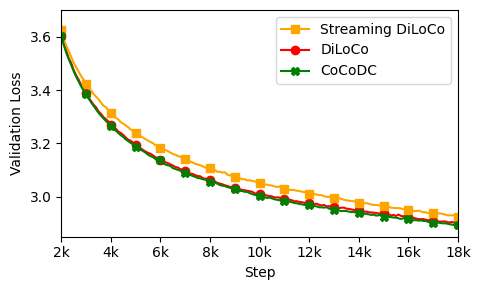

In [70]:
# 根据results中，对齐step，分别画val_loss和perplexity对应的图。三种方法在一张图中
## val_loss 图表修改
plt.figure(figsize=(5, 3))
# 绘制不同方法的曲线，添加标记
line3, = plt.plot(diloco256_results['step'], diloco256_results['val_loss'], 
                 label='Diloco', color='red', marker='o', markevery=10, markersize=6)
line1, = plt.plot(s_diloco_results['step'], s_diloco_results['val_loss'], 
                 label='Streaming Diloco', color='orange', marker='s', markevery=10, markersize=6)
line2, = plt.plot(dc_results['step'], dc_results['val_loss'], 
                 label='CoCoDC', color='green', marker='X', markevery=10, markersize=6)

# 手动排列图例顺序
handles = [line1, line3,  line2]  
labels = [ 'Streaming DiLoCo', 'DiLoCo','CoCoDC']
plt.legend(handles, labels)

# 设置轴标签和范围
plt.xlabel('Step')
plt.ylabel('Validation Loss')
plt.ylim(2.85, 3.7)
plt.xlim(2000, 18000)
plt.tight_layout()
# 格式化x轴刻度为千位数
from matplotlib.ticker import FuncFormatter
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

# 保存图像
plt.savefig(f'{result_dir}/validation_loss_comparison.pdf', format='pdf',bbox_inches='tight')

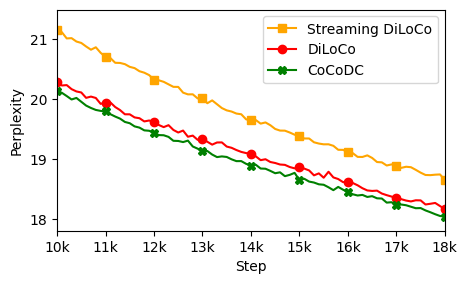

In [71]:
## perplexity
plt.figure(figsize=(5, 3))
line31, = plt.plot(diloco256_results['step'], diloco256_results['perplexity'], label='Diloco', color='red', marker='o', markevery=10, markersize=6)
line11, = plt.plot(s_diloco_results['step'], s_diloco_results['perplexity'], label='Streaming Diloco', color='orange', marker='s', markevery=10, markersize=6)
line21, = plt.plot(dc_results['step'], dc_results['perplexity'], label='CoCoDC', color='green', marker='X', markevery=10, markersize=6)

# 手动排列图例顺序
handles = [line11,line31,  line21]  # 按照你想要的顺序排列
labels = ['Streaming DiLoCo', 'DiLoCo', 'CoCoDC']
plt.legend(handles, labels)

plt.xlabel('Step')
plt.ylabel('Perplexity')
plt.ylim(17.8, 21.5)
plt.xlim(10000, 18000)
plt.tight_layout()
# 删除这个重复的legend()调用
# plt.legend()
from matplotlib.ticker import FuncFormatter
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

plt.savefig(f'{result_dir}/validation_ppl_comparison.pdf', format='pdf',bbox_inches='tight')


Finding intersections for Perplexity = 20.0:
  Streaming Diloco: Crosses at Step ~13021
  CoCoDC: Crosses at Step ~10292
  Diloco BS 256: Crosses at Step ~10821


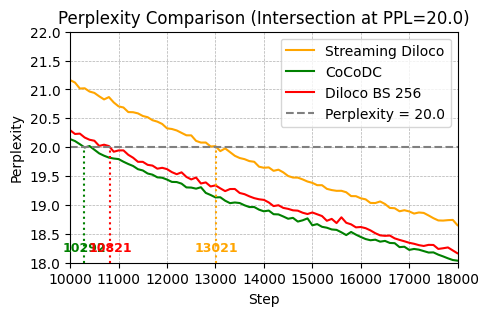

In [72]:
# --- New Cell for Updated Perplexity Plot ---

target_perplexity = 20.0
# --- Plotting Code ---
plt.figure(figsize=(5, 3))

# Plot original curves
# plt.plot(diloco_results['step'], diloco_results['perplexity'], label='Diloco', color='blue')
plt.plot(s_diloco_results['step'], s_diloco_results['perplexity'], label='Streaming Diloco', color='orange')
plt.plot(dc_results['step'], dc_results['perplexity'], label='CoCoDC', color='green')
plt.plot(diloco256_results['step'], diloco256_results['perplexity'], label='Diloco BS 256', color='red')

# Draw horizontal line
plt.axhline(y=target_perplexity, color='grey', linestyle='--', label=f'Perplexity = {target_perplexity:.1f}')

# Define data for intersection finding
results_data = [
    {'df': s_diloco_results, 'label': 'Streaming Diloco', 'color': 'orange'},
    {'df': dc_results, 'label': 'CoCoDC', 'color': 'green'},
    {'df': diloco256_results, 'label': 'Diloco BS 256', 'color': 'red'},
]

# Set plot limits (using the original limits from your code)
plt.ylim(18, 22)
plt.xlim(10000, 18000)
ymin, ymax = plt.ylim()
xmin, xmax = plt.xlim()

print(f"\nFinding intersections for Perplexity = {target_perplexity}:")

# Find and plot intersections using interpolation for better accuracy
for data in results_data:
    df = data['df'].sort_values('step').dropna(subset=['step', 'perplexity']) # Ensure sorted and no NaNs
    steps = df['step'].values
    perplexities = df['perplexity'].values

    intersect_step = None
    # Find indices where perplexity crosses the target value
    # np.searchsorted finds the index where target_perplexity would be inserted to maintain order (descending)
    # We need perplexity <= target, so we look for the first index where this happens
    below_target_indices = np.where(perplexities <= target_perplexity)[0]

    if len(below_target_indices) > 0:
        first_below_idx = below_target_indices[0]

        if first_below_idx == 0:
             # Already below target at the first data point in the range
             intersect_step = steps[0]
             print(f"  {data['label']}: Already below {target_perplexity} at step {intersect_step} (first point in data).")
        else:
            # Interpolate between the point just above and the first point below
            idx1 = first_below_idx - 1
            idx2 = first_below_idx

            step1, perp1 = steps[idx1], perplexities[idx1]
            step2, perp2 = steps[idx2], perplexities[idx2]

            # Ensure we have a valid crossing (one point above, one point below/equal)
            if perp1 > target_perplexity and perp2 <= target_perplexity:
                 # Avoid division by zero if perplexities are identical
                 if perp1 == perp2:
                     intersect_step = step2
                 else:
                     # Linear interpolation: step = step1 + (step2 - step1) * (target - perp1) / (perp2 - perp1)
                     intersect_step = step1 + (step2 - step1) * (target_perplexity - perp1) / (perp2 - perp1)
                 intersect_step = int(round(intersect_step)) # Round to nearest integer step
                 print(f"  {data['label']}: Crosses at Step ~{intersect_step}")
            elif perp2 <= target_perplexity: # If the point before was already below or equal
                 intersect_step = steps[idx2] # Take the first point that meets the criteria
                 print(f"  {data['label']}: Reached {target_perplexity} at or before Step {intersect_step}")


    if intersect_step is not None:
        # Check if the intersection step is within the current x-axis limits for plotting
        if xmin <= intersect_step <= xmax:
            # Plot vertical line from bottom to intersection
            plt.vlines(x=intersect_step, ymin=ymin, ymax=target_perplexity, color=data['color'], linestyle=':')
            # Add text annotation for the step number near the bottom
            plt.text(intersect_step, ymin + 0.05 * (ymax - ymin), f'{intersect_step}', horizontalalignment='center', color=data['color'], fontsize=9, fontweight='bold')
        else:
             print(f"  {data['label']}: Intersection step {intersect_step} is outside the plot's x-limits ({xmin}-{xmax}).")
    else:
         print(f"  {data['label']}: Did not reach {target_perplexity} perplexity in the provided data range.")


plt.xlabel('Step')
plt.ylabel('Perplexity')
plt.title(f'Perplexity Comparison (Intersection at PPL={target_perplexity:.1f})') # Updated title
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5) # Add grid for easier reading
plt.show() # Display the plot